In [1]:
import numpy as np
import matplotlib.pyplot as plt
import default_analysis as da
from scipy.signal import ricker, gaussian

song_file = "./Midnights (3am Edition)/04 Snow On The Beach.mp3"


In [2]:
prediction, sources, audio, sr = da.get_predictions(song_file, 'spleeter:4stems')

c:\Users\nrive\anaconda3\envs\Python39\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


INFO:tensorflow:Apply unet for vocals_spectrogram
Instructions for updating:
Colocations handled automatically by placer.
INFO:tensorflow:Apply unet for drums_spectrogram
INFO:tensorflow:Apply unet for bass_spectrogram
INFO:tensorflow:Apply unet for other_spectrogram
INFO:tensorflow:Restoring parameters from pretrained_models\4stems\model


c:\Users\nrive\anaconda3\envs\Python39\lib\site-packages\matplotlib\axes\_axes.py:7624: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


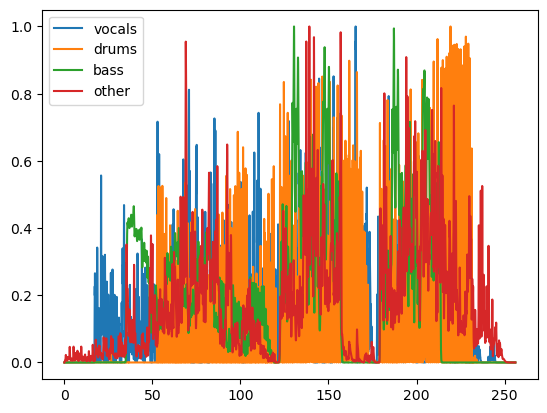

In [3]:
filter = {
    'vocals' : ricker(1200, 0.5),
    'piano' : ricker(1200, 0.5),
    'drums' : ricker(1200, 0.25),
    'bass' : ricker(1200, 0.5),
    'other' : ricker(1200, 0.5),
}

filter2 = {
    'vocals' : gaussian(600, 0.75),
    'piano' : gaussian(600, 2.5),
    'drums' : gaussian(600, 1),
    'bass' : gaussian(600, 5),
    'other' : gaussian(600, 2.5)
}

power, t = da.analyze_power(prediction, sources, sr, filter, filter2)

plt.clf()
for source in sources:
    plt.plot(t, power[source])
plt.legend(sources)

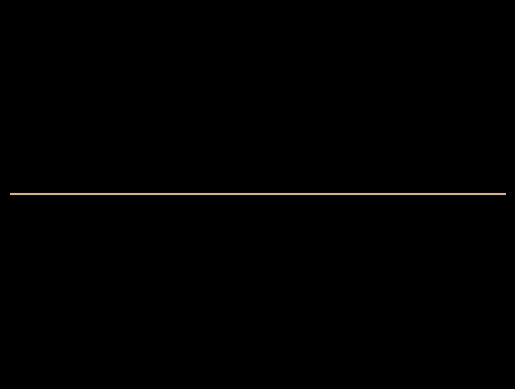

In [6]:
save_folder = './song_files/'
song_name = 'Snow On The Beach'
colors = ['maroon', 'midnightblue','purple', 'tan']

ani = da.create_animation(sources, power, colors)
ani.save(save_folder+song_name+'.mp4')